In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu
from skimage import io, exposure
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle

(750, 600)


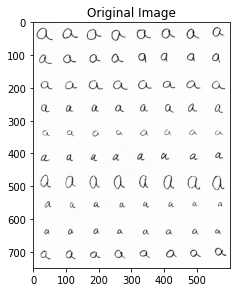

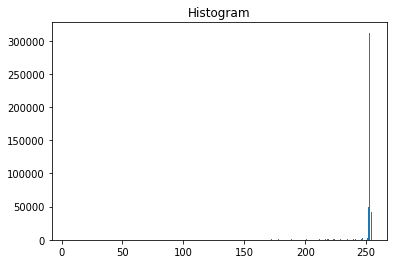

In [5]:
root = 'images/'
img = io.imread(root+'a.bmp')
print(img.shape)


io.imshow(img)
plt.title('Original Image')
io.show()

hist = exposure.histogram(img)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

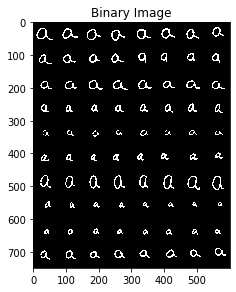

C:\Users\adb203\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


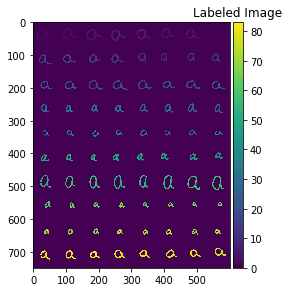

In [6]:
th = 200
img_binary = (img < th).astype(np.double)
io.imshow(img_binary)
plt.title('Binary Image')
io.show()

img_label = label(img_binary, background=0)
io.imshow(img_label)
plt.title('Labeled Image')
io.show()

In [7]:
print( np.amax(img_label) )


83


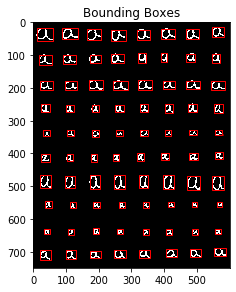

In [8]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()

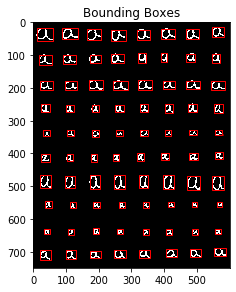

In [9]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()

Features=[]

for props in regions:
    minr, minc, maxr, maxc = props.bbox
    roi = img_binary[minr:maxr, minc:maxc]
    # Computing	Hu	Moments and	Removing	Small	Components
    m = moments(roi)
    cc = m[0, 1] / m[0, 0]
    cr = m[1, 0] / m[0, 0]
    mu = moments_central(roi, center=(cr, cc))
    nu = moments_normalized(mu)
    hu = moments_hu(nu)
    #print(mu,nu,hu)

    Features.append(hu)
    
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1))
ax.set_title('Bounding Boxes')
io.show()




In [10]:
D = cdist(Features, Features)

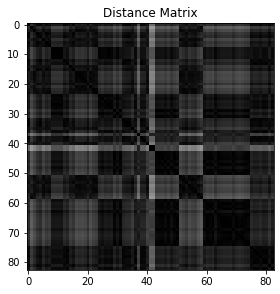

In [11]:
io.imshow(D)
plt.title('Distance Matrix')
io.show()

In [12]:
print(D[1,5])

0.10197978523957557


In [13]:
D_index = np.argsort(D, axis=1) 


In [14]:
print(D_index)

[[ 0 33  4 ... 37 42 41]
 [ 1 58 57 ... 37 42 41]
 [ 2 17 51 ... 37 42 41]
 ...
 [80 76 79 ...  1 42 41]
 [81 15 20 ... 37 42 41]
 [82 79 36 ...  1 42 41]]


In [15]:
print(D_index[40])

[40 35 22 19 53 55 52 23 20 17 18 56 16 15 54 21  6  7 14 81  3 51  5  2
  4 57  0 34 75 12 33 78 39 32 38 77 13 58 76 80 79 82 36  1 28 26 24 27
 10  8  9 11 30 63 25 48 46 59 69 43 74 44 29 49 61 64 31 45 73 47 65 60
 67 50 66 62 72 70 68 71 37 42 41]


In [20]:
pkl_file = open('test_gt.pkl', 'rb')
mydict = pickle.load(pkl_file, encoding="latin1")
pkl_file.close()
classes = mydict['classes']
locations = mydict['locations']
print(classes)
print(locations)

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'q' 'q' 'q' 'q' 'q' 'q' 'q' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
[[ 30  32]
 [108  30]
 [187  34]
 [262  36]
 [333  34]
 [485  32]
 [408  31]
 [ 26 108]
 [111 107]
 [185 107]
 [263 110]
 [338 111]
 [410 107]
 [486 110]
 [ 35 179]
 [117 185]
 [187 185]
 [261 181]
 [336 182]
 [413 182]
 [483 184]
 [ 34 255]
 [116 254]
 [186 259]
 [258 255]
 [330 259]
 [406 256]
 [484 250]
 [ 34 341]
 [118 331]
 [196 335]
 [272 335]
 [337 328]
 [411 331]
 [483 331]
 [ 33 402]
 [115 405]
 [194 399]
 [266 400]
 [340 397]
 [415 401]
 [488 404]
 [ 32 479]
 [116 475]
 [188 474]
 [257 473]
 [334 475]
 [408 476]
 [485 477]
 [ 32 561]
 [117 563]
 [195 561]
 [268 562]
 [336 559]
 [407 558]
 [487 553]
 [ 33 630]
 [114 628]
 [190 628]
 [268 632]
 [335 630]
 [407 632]
 [496 629]
 [ 37 703]
 [109 707]
